### <center>📜 **<font color="green">Question 6:</font> Regression analysis about the cost of houses** </center>

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv('../data/processed/VN_housing_dataset.csv')  
df.head()

,date,address,district,town,house_type,paper_type,num_floors,num_rooms,squares,price_per_m2,price
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5,46,86.96,4000.16
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",Chưa có sổ,0,3,37,116.22,4300.14
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4,40,65.00,2600.00
3,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,0,6,51,100.00,5100.00
4,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",Chưa có sổ,0,4,36,86.11,3099.96


In [75]:
df = df.drop(['date', 'address'], axis=1)

In [76]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import OrdinalEncoder

# Encode categorical variables
oe = OrdinalEncoder()
df[['district', 'house_type', 'town']] = oe.fit_transform(df[['district', 'house_type', 'town']]).astype(int)
  

/home/phatpham/anaconda3/envs/min_ds-env/lib/python3.8/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


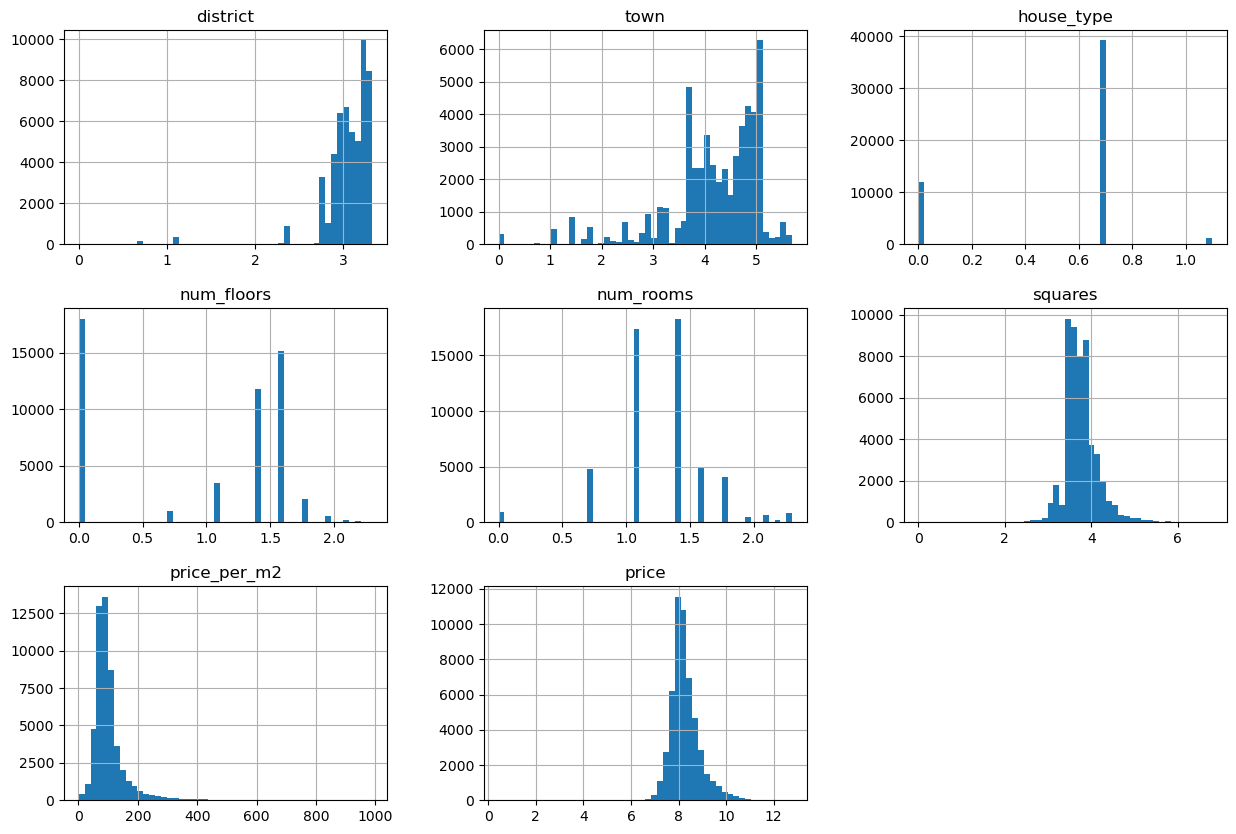

In [77]:
# log transformation
df_log = df.copy()

df_log[['district', 'house_type', 'town', 'price', 'num_floors', 'num_rooms', 'squares']] = np.log(df[['district', 'house_type', 'town','price','num_floors','num_rooms', 'squares']])

# replace inf with 0
df_log = df_log.replace([np.inf, -np.inf], 0)
 
df_paper_log = df_log[df_log['paper_type'] == 'Đã có sổ'].drop(['paper_type'], axis=1)
df_no_paper_log = df_log[df_log['paper_type'] == 'Chưa có sổ'].drop(['paper_type'], axis=1)

df_paper_log.hist(bins=50, figsize=(15,10))
plt.show()

In [78]:
import statsmodels.api as sm

X = df_paper_log.drop(['price', 'price_per_m2'], axis=1)
y = df_paper_log['price']

model1 = sm.OLS(y, X).fit()
model1.summary()

df_paper_log['predicted_price'] = model1.predict(X)

In [79]:
X = df_no_paper_log.drop(['price', 'price_per_m2'], axis=1)
y = df_no_paper_log['price']

model2 = sm.OLS(y, X).fit()

df_no_paper_log['predicted_price'] = model2.predict(X)
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          1.374e+06
Date:                Tue, 16 May 2023   Prob (F-statistic):                        0.00
Time:                        12:10:11   Log-Likelihood:                         -19742.
No. Observations:               28320   AIC:                                  3.950e+04
Df Residuals:                   28314   BIC:                                  3.955e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
district       0.9454      0.008    122.208      0.000       0.930       0.961
town           0.0569      0.003     19.228      0.000       0.051       0.063
house_type    -0.2011      0.010    -19.996      0.000      -0.221      -0.181
num_floors     0.0075      0.012      0.631      0.528      -0.016       0.031
num_rooms      0.2549      0.009     29.499      0.000       0.238       0.272
squares        1.3051      0.007    199.492      0.000       1.292       1.318
==============================================================================
Omnibus:                     9142.275   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           220046.331
Skew:                          -1.004   Prob(JB):                         0.00
Kurtosis:                      16.507   Cond. No.                         27.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""